In [2]:
from oct.startup import *
import matplotlib.pyplot as plt
from pathlib import Path
import sys, os
from fastai.vision import *
import pandas as pd

In [3]:
cocodata_path = Path('/workspace/oct_ca_seg/COCOdata/')
train_path = cocodata_path/'train/images'
valid_path = cocodata_path/'valid/images'
test_path = cocodata_path/'test/images'

In [4]:
metrics = [sens, spec, dice, my_Dice_Loss, acc]

In [5]:
runsave_dir = Path('/workspace/oct_ca_seg/runsaves/')

In [6]:
up_run_name = 'DEEPCAP_09start_10e_001lr_fsmooth_upsample' #best
up_cfg_file = 'DEEPCAP_09start_10e_001lr_fsmooth_upsample'

In [7]:
de_run_name = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in012' #best
de_cfg_file = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in012'

In [8]:
de_run_name_0 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in0' #best
de_cfg_file_0 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in0'

In [9]:
de_run_name_01 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in01' #best
de_cfg_file_01 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in01'

In [10]:
de_run_name_02 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in02' #best
de_cfg_file_02 = 'DEEPCAP_09start_10e_001lr_fsmooth_deconv_in02'

In [11]:
de_test_results = pd.read_json(runsave_dir/(de_run_name+'/test_results.json'))
de_0_test_results = pd.read_json(runsave_dir/(de_run_name_0+'/test_results.json'))
de_01_test_results = pd.read_json(runsave_dir/(de_run_name_01+'/test_results.json'))
de_02_test_results = pd.read_json(runsave_dir/(de_run_name_02+'/test_results.json'))
up_test_results = pd.read_json(runsave_dir/(up_run_name+'/test_results.json'))

[Text(0, 0, 'ALL'), Text(0, 0, 'IM'), Text(0, 0, '2DG'), Text(0, 0, 'ADM')]

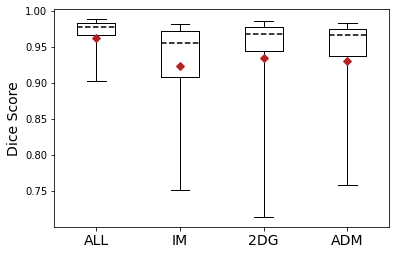

In [12]:
fig, ax = plt.subplots() 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
meanpointprops = dict(marker='D', markeredgecolor='firebrick',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='--', linewidth=1.5, color='black')
ax.boxplot([de_test_results['dice'],
             de_0_test_results['dice'],
             de_01_test_results['dice'],
             de_02_test_results['dice']], showfliers=False, whis=[5,95], labels=['ALL', 'IM', 'ADM', '2DG'], showmeans=True, meanprops=meanpointprops, medianprops=medianprops)
plt.ylabel('Dice Score', fontsize=14)
plt.rc('ytick', labelsize=10) 
ax.set_xticklabels(['ALL', 'IM', '2DG', 'ADM'], fontsize=14)

fig.savefig('/workspace/oct_ca_seg/oct/optinputs', dpi=800)

## means

In [13]:
def results_table(results_df):
    return (pd.concat([results_df.mean(axis=0),
           results_df.std(axis=0),
           results_df.median(axis=0),
           results_df.min(axis=0),
           results_df.max(axis=0)], axis=1).
            rename(columns={0:'mean',1:'std',2:'median',3:'min',4:'max'}))

In [14]:
results_table(de_test_results).round(4)*100

,mean,std,median,min,max
sens,93.24,8.42,95.62,31.62,98.60
spec,99.54,0.77,99.72,89.39,99.93
dice,96.25,5.74,97.76,48.05,99.30
my_Dice_Loss,87.97,2.95,87.83,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


In [15]:
results_table(de_0_test_results).round(4)*100

,mean,std,median,min,max
sens,86.73,11.89,91.52,35.46,98.21
spec,99.11,0.91,99.45,93.08,99.86
dice,92.39,7.98,95.57,52.36,99.10
my_Dice_Loss,87.96,2.96,87.81,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


In [16]:
results_table(de_01_test_results).round(4)*100

,mean,std,median,min,max
sens,88.88,13.01,93.75,13.43,98.16
spec,99.20,1.44,99.59,81.75,99.89
dice,93.48,9.20,96.77,23.67,99.07
my_Dice_Loss,88.01,2.95,87.89,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


In [17]:
results_table(de_02_test_results).round(4)*100

,mean,std,median,min,max
sens,88.25,13.60,93.45,8.44,98.08
spec,98.91,2.62,99.59,69.68,99.92
dice,93.04,10.04,96.61,15.57,99.03
my_Dice_Loss,88.02,2.96,87.92,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


In [18]:
de_train_results = pd.read_json(runsave_dir/(de_run_name+'/trainL.json'))
de_0_train_results = pd.read_json(runsave_dir/(de_run_name_0+'/trainL.json'))
de_01_train_results = pd.read_json(runsave_dir/(de_run_name_01+'/trainL.json'))
de_02_train_results = pd.read_json(runsave_dir/(de_run_name_02+'/trainL.json'))
up_train_results = pd.read_json(runsave_dir/(up_run_name+'/metrics.json'))

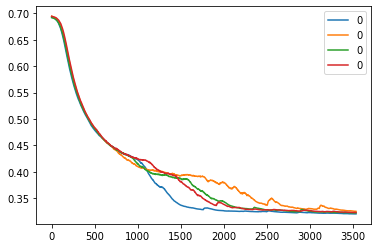

In [19]:
pd.concat([de_train_results.sort_index(),
           de_0_train_results.sort_index(),
           de_01_train_results.sort_index(),
           de_02_train_results.sort_index()], axis=1, names=['all', 'im', '2dg', 'adm']).plot()

## FINAL VS UNET

In [20]:
final_runname = 'DEEPCAP_09start_30e_001lr_fsmooth' #best
final_cfg = 'configCAPS_small_bs24_epochs30_lr0.001.json'

In [21]:
unet_runname = 'UNET_0001_30_final' #best
unet_cfg =  'configUNET_APPresnet18_bs16_epochs15_lr0.001.json'

In [22]:
final_train_results = pd.read_json(runsave_dir/(final_runname+'/validL.json'))
unet_train_results = pd.read_json(runsave_dir/(unet_runname+'/validL.json'))

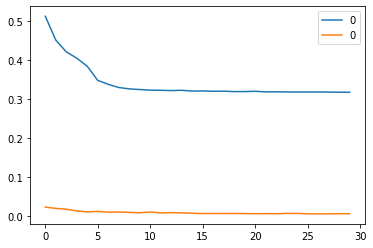

In [23]:
pd.concat([final_train_results.sort_index(), unet_train_results.sort_index()], axis=1).plot()

In [24]:
final_test_results = pd.read_json(runsave_dir/(final_runname+'/test_results.json'))
unet_test_results = pd.read_json(runsave_dir/(unet_runname+'/test_results.json'))

In [25]:
final_test_results['dice'],unet_test_results['dice'] 

(0      0.983441
 1      0.988028
 2      0.972210
 3      0.560457
 4      0.975405
          ...   
 904    0.936270
 905    0.978664
 906    0.980207
 907    0.966705
 908    0.982801
 Name: dice, Length: 909, dtype: float64,
 0      0.966780
 1      0.987902
 2      0.982492
 3      0.986845
 4      0.982906
          ...   
 904    0.981498
 905    0.990412
 906    0.969089
 907    0.947711
 908    0.955115
 Name: dice, Length: 909, dtype: float64)

In [31]:
DETECTRON_test_results = pd.read_json(runsave_dir/('maskrcnn'+'/0.5_results.json'))

In [51]:
DETECTRON_test_results[5:914]['dices']

APl         NaN
1      0.988786
2      0.985444
3      0.984846
4      0.954342
         ...   
904    0.983754
905    0.985908
906    0.985866
907    0.988409
908    0.989236
Name: dices, Length: 909, dtype: float64

In [50]:
results_table(DETECTRON_test_results[6:915])

,mean,std,median,min,max
bbox,NaN,NaN,NaN,NaN,NaN
segm,NaN,NaN,NaN,NaN,NaN
dices,0.970408,0.055119,0.982705,0.431369,0.991232
accs,0.996430,0.006885,0.997913,0.921585,0.999283
sens,0.946759,0.079731,0.965998,0.274997,0.982616
specs,0.996218,0.007197,0.997765,0.919181,0.999255
scores,NaN,NaN,NaN,NaN,NaN


In [29]:
results_table(final_test_results).round(4)*100

,mean,std,median,min,max
sens,94.58,7.75,96.55,28.57,98.63
spec,99.63,0.62,99.78,93.29,99.93
dice,97.00,5.28,98.24,44.44,99.31
my_Dice_Loss,87.99,2.98,87.83,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


In [30]:
results_table(unet_test_results).round(4)*100

,mean,std,median,min,max
sens,94.17,8.06,96.20,36.31,98.87
spec,99.60,0.65,99.76,93.27,99.94
dice,96.77,5.42,98.06,53.28,99.43
my_Dice_Loss,88.01,2.95,87.86,79.69,94.56
acc,3.57,0.00,3.57,3.57,3.57


(array([[1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 1.000e+01, 3.300e+01, 8.450e+02],
        [0.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 1.200e+01, 2.000e+01, 8.500e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 1.600e+01, 5.000e+01, 2.424e+03]]),
 array([0.444444, 0.499431, 0.554418, 0.609405, 0.664392, 0.719379, 0.774366, 0.829352, 0.884339, 0.939326, 0.994313]),
 <a list of 3 Lists of Patches objects>)

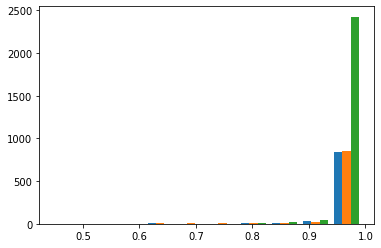

In [57]:
plt.hist([final_test_results['dice'], unet_test_results['dice'], DETECTRON_test_results[5:]['dices']])

## STATISITCAL TESTS

In [34]:
from scipy.stats import mannwhitneyu, ttest_rel, ttest_ind, wilcoxon

### UNET VS DEEPCAP

In [35]:
wilcoxon(final_test_results['dice'],unet_test_results['dice'])

WilcoxonResult(statistic=177192.0, pvalue=0.0001847311488389524)

In [48]:
wilcoxon(final_test_results['dice'],DETECTRON_test_results['dices'][5:914])

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:2882: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:2883: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=206012.0, pvalue=0.9209756389596107)

In [34]:
ttest_rel(final_test_results['dice'],unet_test_results['dice'])

Ttest_relResult(statistic=0.9350754365798642, pvalue=0.3499980323577482)

#### OPTIMAL INPUTS

In [44]:
wilcoxon(de_test_results['dice'],de_0_test_results['dice'])

WilcoxonResult(statistic=73863.0, pvalue=2.9384636680483606e-63)

In [45]:
wilcoxon(de_test_results['dice'],de_01_test_results['dice'])

WilcoxonResult(statistic=115640.0, pvalue=1.1379213079845183e-30)

In [46]:
wilcoxon(de_test_results['dice'],de_02_test_results['dice'])

WilcoxonResult(statistic=107243.0, pvalue=2.9629100818071322e-36)

### DECONV vs BILINEAR UPSAMPLE

In [42]:
ttest_ind(de_test_results['dice'],up_test_results['dice'])

Ttest_indResult(statistic=3.811379952682693, pvalue=0.0001428000128992315)

In [41]:
wilcoxon(de_test_results['dice'],up_test_results['dice'])

WilcoxonResult(statistic=172229.0, pvalue=1.266389223722177e-05)

## Comparing GPU speed of inference on both UNET and DEEPCAP

In [ ]:
from model import CapsNet
from fastai.utils.mem import gpu_mem_get_all

In [27]:
def loadConfigRun(run_dir, name):
    with open(run_dir/name, 'r') as file:
        return json.load(file)

In [28]:
run_dir = runsave_dir/final_runname

In [29]:
cfg_dict = loadConfigRun(run_dir, final_cfg)

In [30]:
config = DeepConfig(cfg_dict)

In [31]:
def _in_delta(x):
    #print(x.shape)
    return x[config.MODEL.input_images,:,:]
in_delta = TfmPixel(_in_delta, order=0)
in_delta.use_on_y = False

In [32]:
fn_get_y = lambda image_name: Path(image_name).parent.parent/('labels/'+Path(image_name).name)
codes = np.loadtxt(cocodata_path/'codes.txt', dtype=str)
tfms = get_transforms()
tfms[0].append(in_delta())
tfms[1].append(in_delta())
src = (SegCustomItemList
       .from_folder(test_path, recurse=True, extensions='.jpg')
       .filter_by_func(lambda fname: Path(fname).parent.name == 'images', )
       .split_by_rand_pct(0.90)
       .label_from_func(fn_get_y, classes=codes))
src.transform(tfms, tfm_y=True, size =config.LEARNER.img_size)
data = src.databunch(test_path,
                     bs=config.LEARNER.bs,
                     val_bs=config.LEARNER.bs,
                     num_workers = config.LEARNER.num_workers)
#stats = [torch.tensor([0.2190, 0.1984, 0.1928]), torch.tensor([0.0645, 0.0473, 0.0434])]
stats = data.batch_stats()
data.normalize(stats);
data.c_in, data.c_out = config.MODEL.inputchannels, 2

In [33]:
xb,_=data.one_batch(ds_type=DatasetType.Valid,detach=True, denorm=False, cpu=False)

In [34]:
xb.shape

torch.Size([24, 3, 256, 256])

In [35]:
xb.device

device(type='cuda', index=0)

In [39]:
gpu_mem_get_all()

[GPUMemory(total=16280, free=7529, used=8751),
 GPUMemory(total=16280, free=16270, used=10),
 GPUMemory(total=16280, free=16270, used=10),
 GPUMemory(total=16280, free=16270, used=10)]

In [37]:
deepCap = CapsNet(config.MODEL).cuda()

In [38]:
%%timeit
deepCap(xb)

106 ms ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
unet = unet_learner(data, models.resnet18, pretrained=False, metrics = metrics)

In [43]:
%%timeit
unet.model(xb)

149 ms ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
